In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
train_dir = "dataset/train"  

In [3]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

train_generator = datagen.flow_from_directory(train_dir,target_size=IMG_SIZE,batch_size=BATCH_SIZE,class_mode='binary',subset='training')

val_generator = datagen.flow_from_directory(train_dir,target_size=IMG_SIZE,batch_size=BATCH_SIZE,class_mode='binary',subset='validation')


Found 203 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  
])

/opt/anaconda3/envs/dlib_new/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer=Adam(),loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
callbacks = [EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),ModelCheckpoint('cnn_model.h5', save_best_only=True)]

history = model.fit(train_generator,epochs=20,validation_data=val_generator,callbacks=callbacks)

Epoch 1/20


/opt/anaconda3/envs/dlib_new/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.6376 - loss: 0.8899

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - accuracy: 0.6373 - loss: 0.8792 - val_accuracy: 0.7400 - val_loss: 0.5796
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 168ms/step - accuracy: 0.7713 - loss: 0.5237 - val_accuracy: 0.6800 - val_loss: 0.6489
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 0.7259 - loss: 0.5168 - val_accuracy: 0.7000 - val_loss: 0.6072
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.7338 - loss: 0.5736

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - accuracy: 0.7394 - loss: 0.5663 - val_accuracy: 0.7400 - val_loss: 0.5311
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 0.8281 - loss: 0.4467 - val_accuracy: 0.7400 - val_loss: 0.5654
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 0.7900 - loss: 0.4372

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step - accuracy: 0.7941 - loss: 0.4359 - val_accuracy: 0.7800 - val_loss: 0.5038
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.8164 - loss: 0.4467

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - accuracy: 0.8203 - loss: 0.4410 - val_accuracy: 0.7600 - val_loss: 0.4971
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 0.8700 - loss: 0.3023 - val_accuracy: 0.7200 - val_loss: 0.5426
Epoch 9/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.8706 - loss: 0.3114 - val_accuracy: 0.8000 - val_loss: 0.5532
Epoch 10/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.9038 - loss: 0.2667

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.9017 - loss: 0.2679 - val_accuracy: 0.8000 - val_loss: 0.4818
Epoch 11/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 0.9269 - loss: 0.1939

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.9231 - loss: 0.1970 - val_accuracy: 0.7800 - val_loss: 0.4563
Epoch 12/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - accuracy: 0.9499 - loss: 0.1526 - val_accuracy: 0.7800 - val_loss: 0.6011
Epoch 13/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - accuracy: 0.9723 - loss: 0.1071

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 191ms/step - accuracy: 0.9715 - loss: 0.1097 - val_accuracy: 0.8400 - val_loss: 0.4247
Epoch 14/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.9637 - loss: 0.0901 - val_accuracy: 0.8200 - val_loss: 0.4977
Epoch 15/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 0.9787 - loss: 0.0589 - val_accuracy: 0.8200 - val_loss: 0.4853
Epoch 16/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 0.9913 - loss: 0.0382 - val_accuracy: 0.8000 - val_loss: 0.5052
Epoch 17/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.9943 - loss: 0.0309 - val_accuracy: 0.7800 - val_loss: 0.5680
Epoch 18/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - accuracy: 0.9929 - loss: 0.0216 - val_accuracy: 0.7800 - val_loss: 0.6367


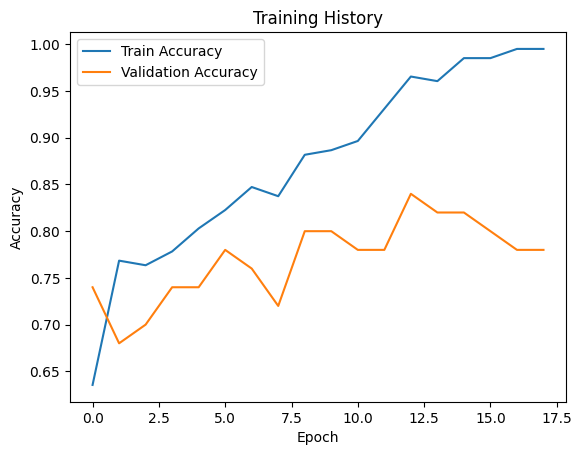

In [14]:
# Step 7: Plot training results
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training History')
plt.show()


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory('dataset/train',target_size=IMG_SIZE,batch_size=32,class_mode='binary')

loss, accuracy = model.evaluate(test_generator)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")
print(f"\nTest loss: {loss * 100:.2f}%")

Found 253 images belonging to 2 classes.
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9486 - loss: 0.1366

Test Accuracy: 95.26%

Test loss: 15.14%
